# Sales Analysis



# Introduction

The Sales Analysis project aims to gain insights from a dataset of sales data to understand the trends, patterns, and factors influencing sales performance. By leveraging the power of Python programming language and popular libraries such as pandas, NumPy, and Matplotlib, this project focuses on applying data analytics techniques to extract valuable information from the sales dataset.

The dataset used in this project consists of historical sales records, including information such as product details, transaction dates, prices, discounts, and customer demographics. The dataset spans a specific time period and covers multiple regions or stores.

The primary objectives of this project are as follows:

1. **Identify Sales Trends:** Analyze the sales data to identify trends and patterns over time. By examining the variations in sales figures, we can determine whether there are any seasonal or cyclical patterns and understand the overall growth or decline in sales.

2. **Evaluate Product Performance:** Examine the sales performance of different products or product categories. This involves identifying top-selling items, understanding the distribution of sales across various products, and assessing the impact of factors such as pricing, discounts, or marketing campaigns on product sales.

3. **Explore Geographical Analysis:** Perform a geographical analysis to identify regional variations in sales. By visualizing sales across different regions or stores on a map, we can identify areas with high sales volumes or regions where additional marketing efforts may be required.

4. **Provide Actionable Insights:** Interpret the findings and provide actionable insights for decision-making. By analyzing the data and identifying key trends, patterns, and factors influencing sales, we can provide recommendations to improve sales performance, optimize marketing strategies, or target specific customer segments.

By undertaking this Sales Analysis project, we aim to leverage data analytics techniques to gain a comprehensive understanding of the sales data, extract meaningful insights, and provide valuable recommendations to enhance sales performance and drive business growth.


This data is made of the sales of a company for a year divide in months, it contains informations such as product name, Quantity ordered, date, price each, date and adresse of purchase

# Importing nessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Since the data is made of 12 different files let's merge then into a single one
## Merging files

In [2]:
files = [file for file in os.listdir('./Sales_Data')]
all_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_data=pd.concat([all_data,df])
all_data.to_csv('all_data.csv',index=False)
    

# Data cleaning and preprocessing

## Data audit

In [3]:
#Printing the first 10 lines of the dataFrame
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [4]:
#Printing the last 10 lines of the dataFrame
all_data.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11676,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001"
11677,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
11678,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
11679,259351,Apple Airpods Headphones,1,150,09/01/19 19:43,"981 4th St, New York City, NY 10001"
11680,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016"
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [5]:
#Shape of the dataFrame
all_data.shape

(186850, 6)

As we can see the dataFrame is made of 186850 rows and 6 columns

In [6]:
# List the columns of the dataFrame
all_data.columns


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [7]:
#summarize the dataFrame
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## Handling missing data

In [8]:
#Checking the number of row containing NaN values
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

As we can see there are 545 NaN rows in each column,let identify them clearly

In [9]:
#Viewing the NaN values in separate df
NaN_df = all_data[all_data.isna().any(axis=1)]
NaN_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Dropping the NaN values
all_data.dropna(how='all',inplace=True)
all_data.isna().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

All the data is free from NaN values 

## Handling duplicate values

In [11]:
# all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data[all_data['Quantity Ordered'].str[0:2]=='Qu']
# all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


As we can see there are 355 duplicate values 

In [12]:
all_data = all_data[all_data['Quantity Ordered'].str[0:2]!='Qu']
all_data[all_data['Quantity Ordered'].str[0:2]=='Qu']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## Setting the correct datatype of the columns

In [13]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


# Analysis questions

# q1: What was the best month for sales?

## Add the month column 

In [15]:
#Add month columm
all_data['Month']=all_data['Order Date'].dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


## Add the Sales column
### Sales = quantity ordered * price each

In [16]:
#Add Sales column
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [59]:
Sales_per_month=all_data.groupby('Month').sum(numeric_only=True).reset_index().sort_values('Sales')
Sales_per_month

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1811768.38,1822256.73
8,9,13109,2084992.09,2097560.13
1,2,13449,2188884.72,2202022.42
7,8,13448,2230345.42,2244467.88
5,6,15253,2562025.61,2577802.26
6,7,16072,2632539.56,2647775.76
2,3,17005,2791207.83,2807100.38
4,5,18667,3135125.13,3152606.75
10,11,19798,3180600.68,3199603.20
3,4,20558,3367671.02,3390670.24


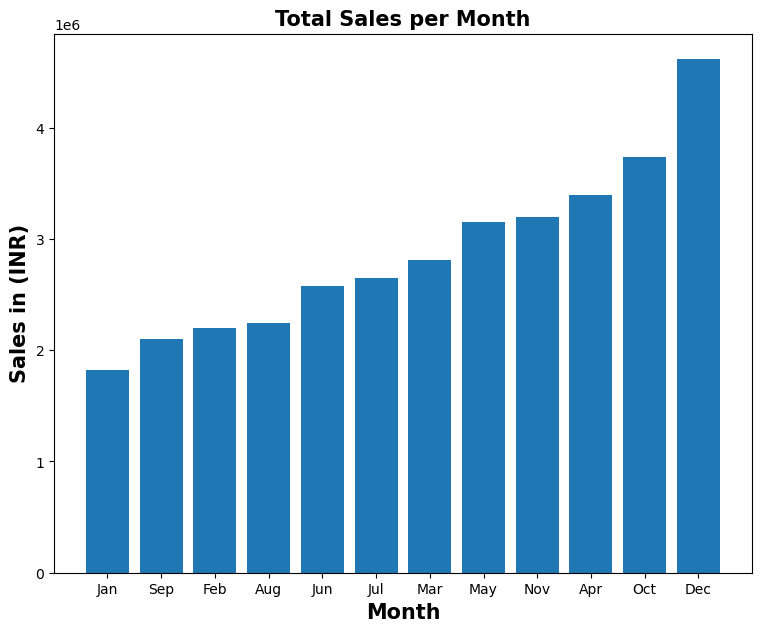

In [79]:
import calendar
month=[calendar.month_abbr[num] for num in Sales_per_month['Month']]

plt.figure(figsize=(9, 7))
plt.bar(month,Sales_per_month['Sales'])

plt.xlabel('Month',fontweight='bold', fontsize=15)

plt.ylabel('Sales in (INR)',fontweight='bold', fontsize=15)
plt.title('Total Sales per Month',fontweight='bold', fontsize=15)
plt.show()


#### The month with the most sales is December

# Q2  What city sold the most product? 

## Add a City column

In [33]:
def getCity(address):
    return address.split(",")[1]

def getState(address):
    return address.split(",")[2].split()[0]

all_data['City']=all_data['Purchase Address'].apply(lambda x:f"{getCity(x)} {getState(x)}")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [55]:
Sales_per_City = all_data.groupby('City').sum(numeric_only=True).reset_index().sort_values('Sales')
Sales_per_City

,City,Quantity Ordered,Price Each,Month,Sales
6,Portland ME,2750,447189.25,17144,449758.27
1,Austin TX,11153,1809873.61,69829,1819581.75
7,Portland OR,11303,1860558.22,70621,1870732.34
9,Seattle WA,16553,2733296.01,104941,2747755.48
3,Dallas TX,16730,2752627.82,104620,2767975.40
0,Atlanta GA,16602,2779908.20,104794,2795498.58
2,Boston MA,22528,3637409.77,141112,3661642.01
5,New York City NY,27932,4635370.83,175741,4664317.43
4,Los Angeles CA,33289,5421435.23,208325,5452570.80
8,San Francisco CA,50239,8211461.74,315520,8262203.91


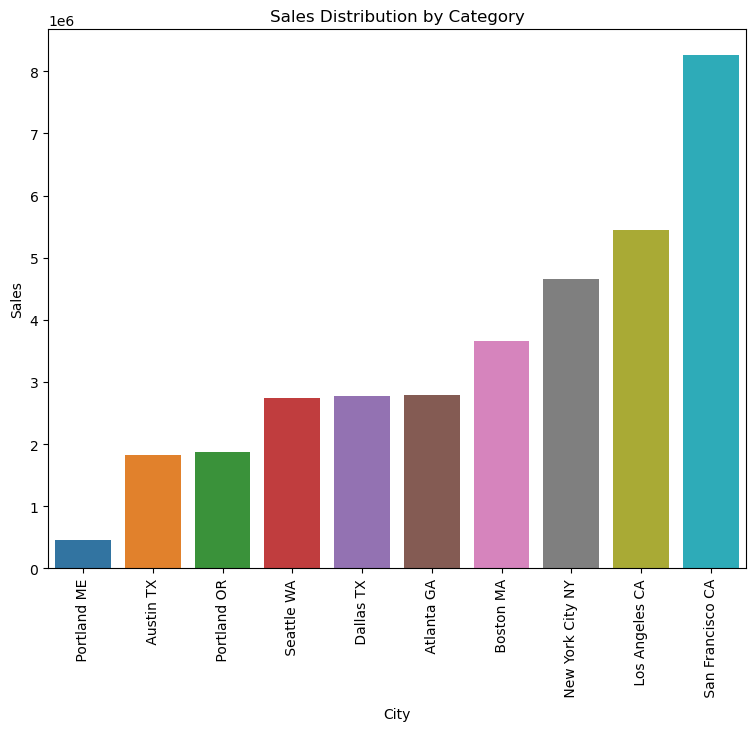

In [78]:
plt.figure(figsize=(9,7))
sns.barplot(x='City',y='Sales',data=Sales_per_City)
plt.title('Sales Distribution by Category')

plt.xticks(rotation=90)
plt.show()

# Q3: What time should we display advertisements to maximize the likelihood of purchases?

## Add hour and minute columns

In [62]:
#add hour column
all_data['Hour']=all_data['Order Date'].dt.hour
#add minute column
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [64]:
Sales_per_hours = all_data.groupby('Hour').sum(numeric_only=True).reset_index()
Sales_per_hours

,Hour,Quantity Ordered,Price Each,Month,Sales,Minute
0,0,4428,709296.70,27554,713721.27,103596
1,1,2619,458490.00,16657,460866.88,61807
2,2,1398,233833.64,8507,234851.44,32508
3,3,928,144726.42,5904,145757.89,23044
4,4,937,162058.18,6148,162661.01,26876
5,5,1493,229621.21,9301,230679.82,42877
6,6,2810,445000.11,17539,448113.00,80343
7,7,4556,740568.11,28850,744854.12,127447
8,8,7002,1185970.62,43626,1192348.97,198135
9,9,9816,1628498.49,60981,1639030.58,268253


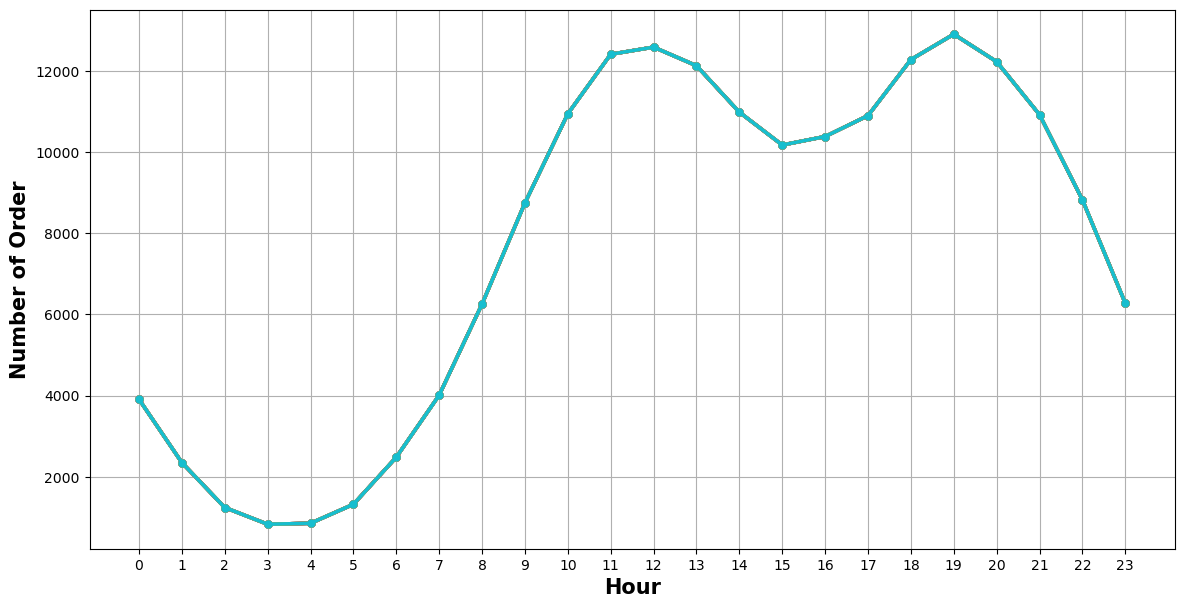

In [76]:
plt.figure(figsize=(14,7))
plt.plot(Sales_per_hours['Hour'],all_data.groupby('Hour').count(),linewidth=2.5,marker='o', markersize=5)
plt.xlabel('Hour',fontweight='bold', fontsize=15)
plt.ylabel('Number of Order',fontweight='bold', fontsize=15)
plt.grid()
plt.xticks(Sales_per_hours['Hour'])
plt.show()


# Q3: What products are most often sold together?

### Identifying duplicated Order ID

In [86]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df

C:\Users\Hp\AppData\Local\Temp\ipykernel_10744\148804374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


#### The above DataFrame is a data of items that have been bought together now we need to count the occurence of each combination using the combinations method from the itertools and the Counter class from collections

In [116]:
from itertools import combinations
from collections import Counter

theCounter = Counter()
for eachRow in df['Grouped']:
    rowList = eachRow.split(",")
    theCounter.update(combinations(rowList,2))
GroupedDf = pd.DataFrame(theCounter.most_common(15), columns=['Product', 'Quantity'])
GroupedDf['Product'] = GroupedDf['Product'].apply(lambda x:', '.join(x))
GroupedDf

,Product,Quantity
0,"iPhone, Lightning Charging Cable",1005
1,"Google Phone, USB-C Charging Cable",987
2,"iPhone, Wired Headphones",447
3,"Google Phone, Wired Headphones",414
4,"Vareebadd Phone, USB-C Charging Cable",361
5,"iPhone, Apple Airpods Headphones",360
6,"Google Phone, Bose SoundSport Headphones",220
7,"USB-C Charging Cable, Wired Headphones",160
8,"Vareebadd Phone, Wired Headphones",143
9,"Lightning Charging Cable, Wired Headphones",92


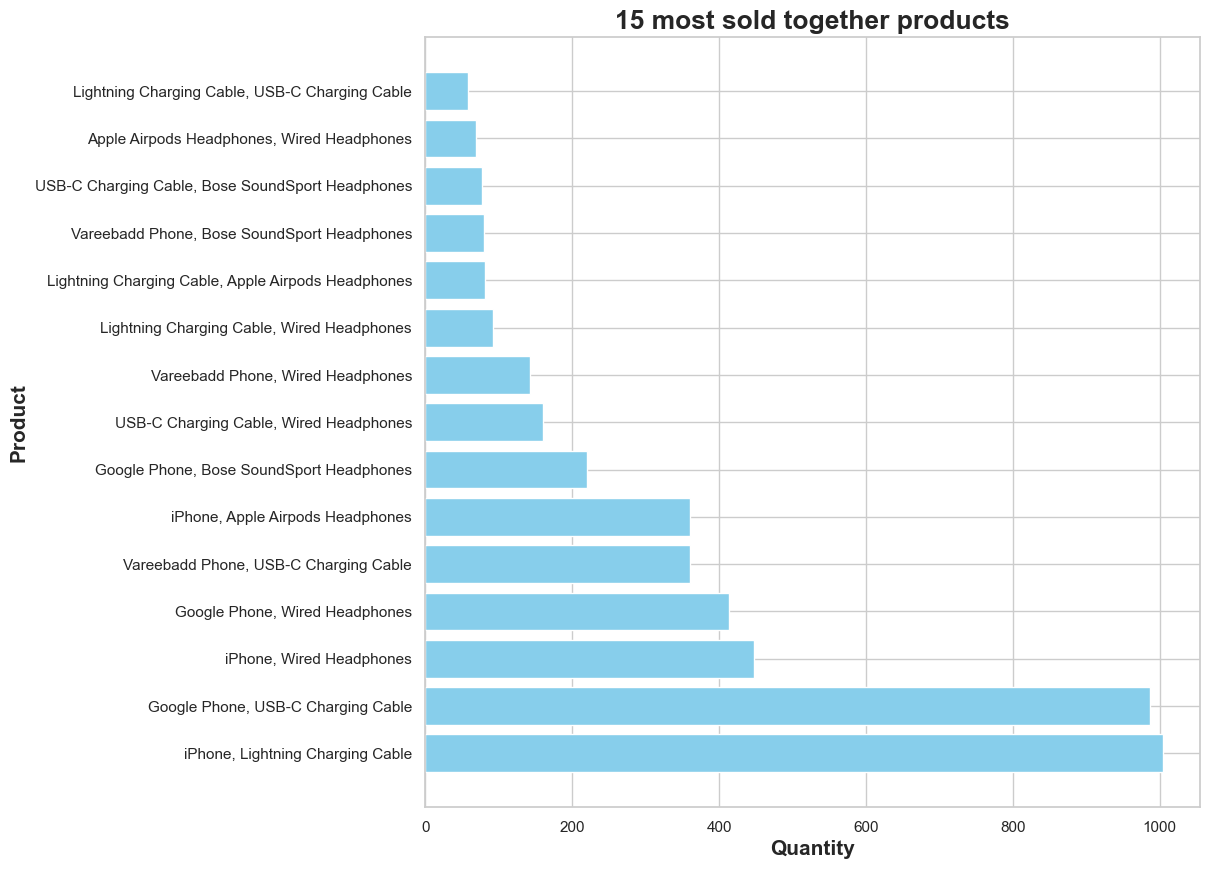

In [135]:
plt.figure(figsize=(10,10))

plt.barh(GroupedDf['Product'], GroupedDf['Quantity'], color='skyblue')

plt.title('15 most sold together products',fontweight='bold',fontsize=19)
plt.xlabel('Quantity',fontweight='bold',fontsize=15)
plt.ylabel('Product',fontweight='bold',fontsize=15)

plt.show()


# Q5: What product sold the most? Why do you think it did?

In [133]:
Order_per_product=all_data.groupby('Product').sum(numeric_only=True).reset_index()[['Product','Quantity Ordered']].sort_values('Quantity Ordered')
Order_per_product

,Product,Quantity Ordered
10,LG Dryer,646
11,LG Washing Machine,666
16,Vareebadd Phone,2068
0,20in Monitor,4129
14,ThinkPad Laptop,4130
13,Macbook Pro Laptop,4728
8,Flatscreen TV,4819
9,Google Phone,5532
3,34in Ultrawide Monitor,6199
1,27in 4K Gaming Monitor,6244


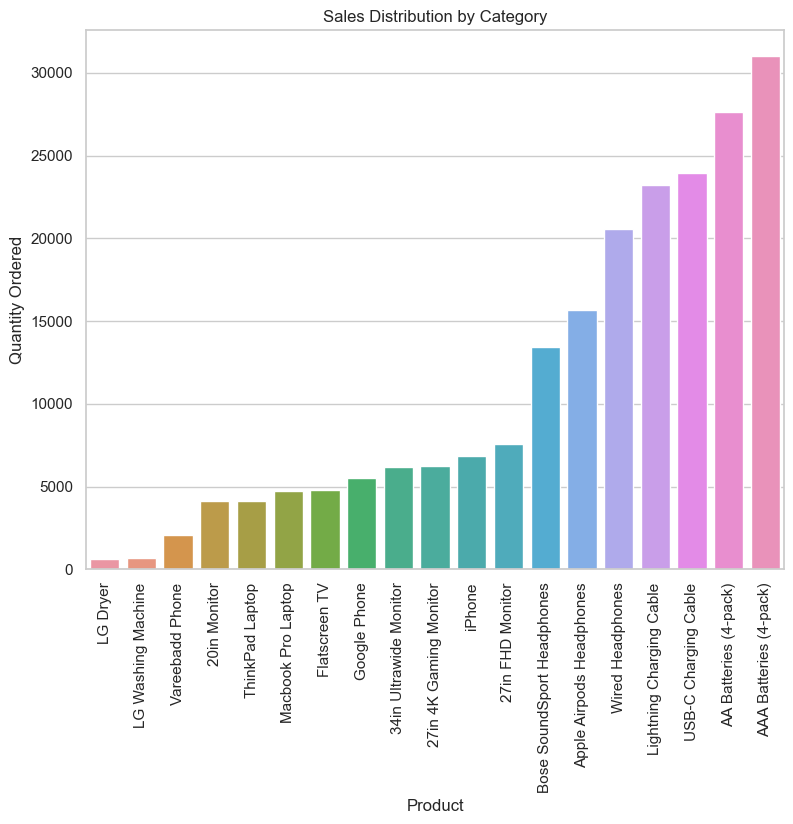

In [137]:
plt.figure(figsize=(9,7))
sns.barplot(x='Product',y='Quantity Ordered',data=Order_per_product)
plt.title('Sales Distribution by Category')

plt.xticks(rotation=90)
plt.show()

ValueError: Grouper and axis must be same length